In [2]:
import pandas as pd
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from itertools import combinations
import os

[10000.0, 10000.0, 6250.0, 6250.0, 6250.0, 6250.0, 3750.0, 10000.0, 3750.0, 6250.0, 3750.0, 2500.0]


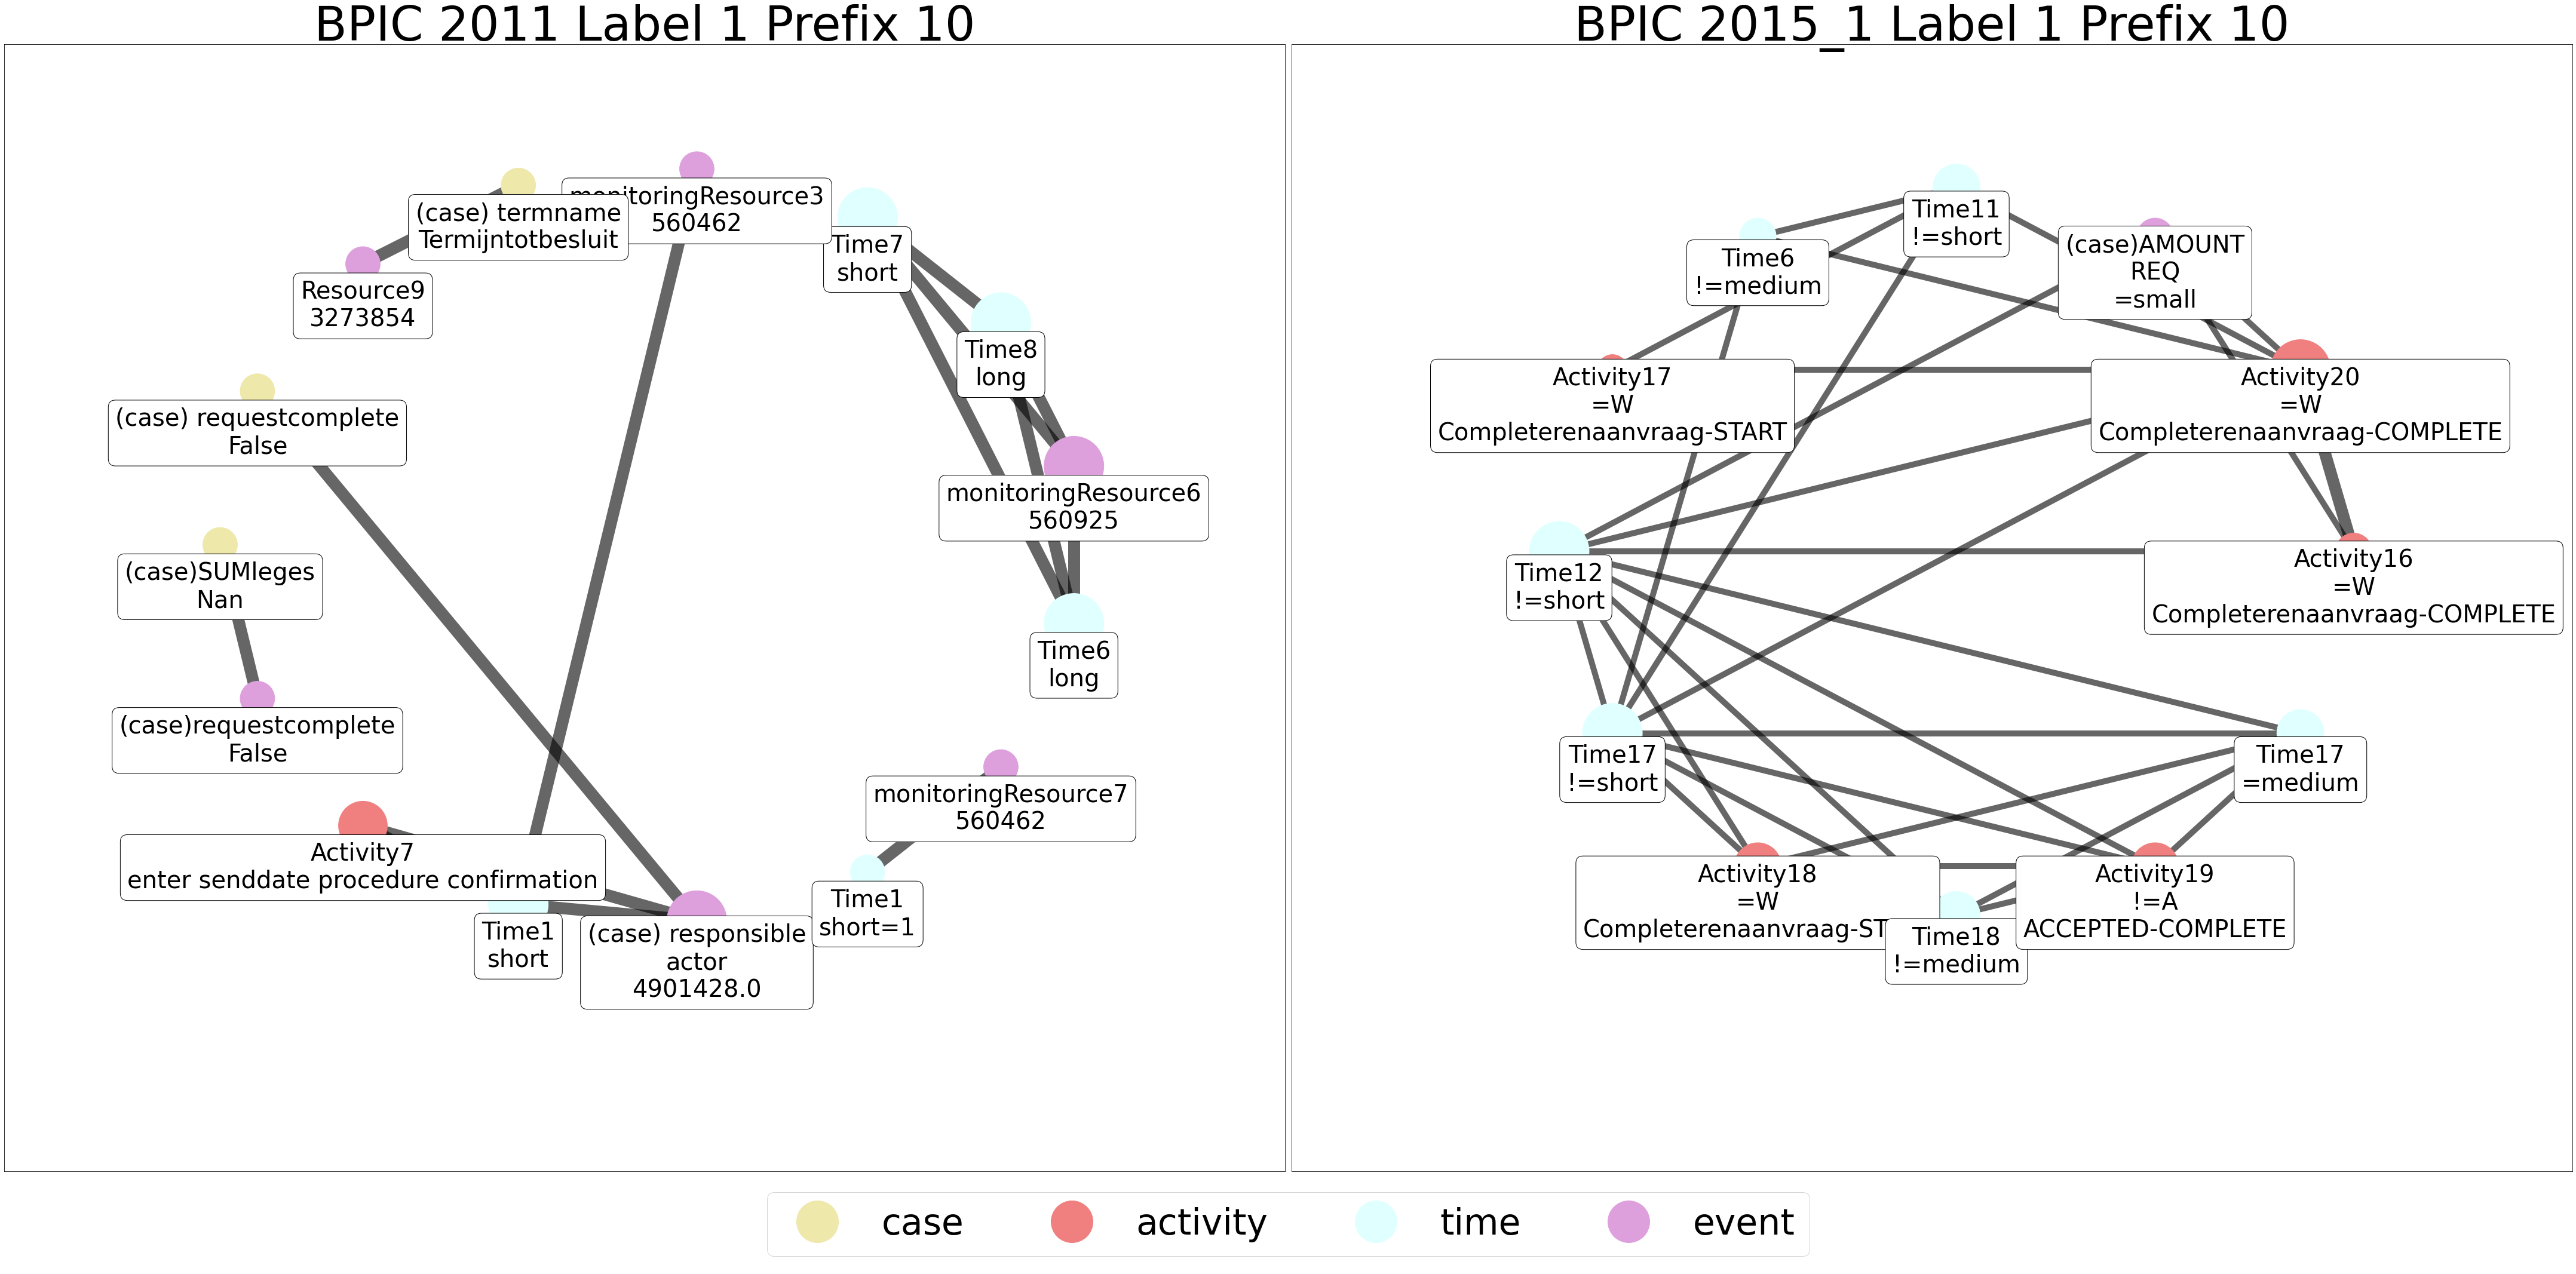

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(60,30))
ax1 = ax[0]
ax2 = ax[1]
prefix = str(10)
graph = nx.Graph()
edges = {}

nodefrequency = {}

# filename = '../dat/dataset/bpic/bpic2011/RIPPER/ruleresult/way3/threshold0.8/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'
# filename = '../daa/dataset/bpic/bpic2012/ruleresult/way3/threshold0.7/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'
# filename = '../data/dataset/bpic/bpic2015_1/rule2/ruleresult/way3/threshold0.5/Summarized_Rule_prefix'+str(prefix)+'_rnd1.json'
# filename = '../data/dataset/bpic/bpic2017/rule2/ruleresult/way3/threshold0.5/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'
# filename = '../data/dataset/sepsis/rule1/ruleresult/way3/threshold0.9/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'


# 
ante = []
label = 'Label 1'

title = 'BPIC 2015_1 '+label+' Prefix '+prefix 
label = 'Label_1'


# BPIC 2011
case_att = ['(case) Diagnosis code', '(case) Diagnosis code:1', '(case) Diagnosis code:2',
               '(case) Diagnosis code:3', '(case) Diagnosis code:4', '(case) Diagnosis code:5', '(case) Diagnosis code:6', '(case) Diagnosis code:7',
               '(case) Diagnosis code:8', '(case) Diagnosis code:9', '(case) Diagnosis code:10', '(case) Diagnosis code:11', '(case) Diagnosis code:12',
               '(case) Diagnosis code:13', '(case) Diagnosis code:14', '(case) Diagnosis code:15', '(case) Specialism code',
               '(case) Specialism code:1', '(case) Specialism code:2', '(case) Specialism code:3', '(case) Specialism code:4', '(case) Specialism code:5',
               '(case) Specialism code:6', '(case) Specialism code:7', '(case) Specialism code:8', '(case) Specialism code:9', '(case) Specialism code:10',
               '(case) Specialism code:11', '(case) Specialism code:12', '(case) Specialism code:13', '(case) Specialism code:14', '(case) Specialism code:15',
               '(case) Treatment code', '(case) Treatment code:1', '(case) Treatment code:2', '(case) Treatment code:3', '(case) Treatment code:4',
               '(case) Treatment code:5', '(case) Treatment code:6', '(case) Treatment code:7', '(case) Treatment code:8', '(case) Treatment code:9',
               '(case) Treatment code:10', '(case) Treatment code:11', '(case) Treatment code:12', '(case) Treatment code:13', '(case) Treatment code:14',
               '(case) Treatment code:15','(case) Age', '(case) Age:1', '(case) Age:2', '(case) Age:3', '(case) Age:4', '(case) Age:5' ]
event_att = ['Producer code', 'Section', 'Specialism code']


# BPIC 2012
# case_att = ['(case) AMOUNT_REQ']
# event_att = ['Resource']


# BPIC 2017
# case_att = ['CreditScore','FirstWithdrawalAmount','MonthlyCost', 'NumberOfTerms','OfferedAmount']
# event_att = ['Resource']


# sepsis
# case_att = ['Diagnose','DiagnosticArtAstrup','DiagnosticBlood','DiagnosticECG','DiagnosticIC','DiagnosticLacticAcid',
#                 'DiagnosticLiquor','DiagnosticOther','DiagnosticSputum','DiagnosticUrinaryCulture','DiagnosticUrinarySediment',
#                 'DiagnosticXthorax','DisfuncOrg','Hypotensie','Hypoxie','InfectionSuspected','Infusion','Oligurie','SIRSCritHeartRate',
#                 'SIRSCritLeucos','SIRSCritTachypnea','SIRSCritTemperature','SIRSCriteria2OrMore','Age']
# event_att = ['Resource','CRP','LacticAcid','Leucocytes']


act = ['Activity']
time = ['Time']

# data = [ 'Specialism code3_86/(case) Diagnosis code_M16','Specialism code4_86/(case) Diagnosis code_M16',
#  'Specialism code3_86/(case) Diagnosis code:1_M16', '(case) Specialism code:1_7.0/(case) Diagnosis code_M14/Specialism code1_86',
#  '(case) Diagnosis code:1_M14’/Producer code1_SGNA', 'Specialism code1_86/(case) Diagnosis code_M14',
#  '(case) Diagnosis code:1_M16/Specialism code8_86' ]
#2015
data = ['(case)requestcomplete_=False','Activity2_=enter send date acknowledgement/Activity11_=phased application',
 'Activity2_=enter send date acknowledgement/(case)termname_!=Termijnbezwaarenberoep1/(case)responsible_actor_=4901428.0/Activity7_=enter send date procedure confirmation',
 'Activity2_=enter send date acknowledgement/Activity8_=enter send date retrieve missing data',
 'Activity9_=enter send date retrieve missing data','Activity2_=enter send date acknowledgement/Activity7_=enter send date retrieve missing data',
 'Activity10_=enter send date retrieve missing data','Activity7_=enter send date retrieve missing data']

for t in data:
    ante.append(t.split('/'))

for rules in ante:
    for combis in list(combinations(rules,2)):
        combis = tuple(sorted(combis))
        if combis[0] not in list(nodefrequency.keys()):
            nodefrequency[combis[0]] =1
        else:
            nodefrequency[combis[0]] +=1

        if combis[1] not in list(nodefrequency.keys()):
            nodefrequency[combis[1]] =1
        else:
            nodefrequency[combis[1]] +=1


        if combis not in list(edges.keys()):
            edges[combis] =1
        else:
            edges[combis] +=1

edgeweight=[]
colorset ={'case':'palegoldenrod','activity':'lightcoral','time':'lightcyan','event':'plum'}
for x,y in edges.keys():
    if x.split('_')[0] in case_att or '(case)' in x.split('_')[0]:
        graph.add_node(x,color=colorset['case'],freqeuncy=nodefrequency[x])
    elif 'Activity' in x.split('_')[0]:
        graph.add_node(x,color=colorset['activity'],freqeuncy=nodefrequency[x])
    elif 'Time' in x.split('_')[0]:
        graph.add_node(x,color=colorset['time'],freqeuncy=nodefrequency[x])
    else:
        graph.add_node(x,color=colorset['event'],freqeuncy=nodefrequency[x])

    if y.split('_')[0] in case_att:
        graph.add_node(y,color=colorset['case'],freqeuncy=nodefrequency[y])
    elif 'Activity' in y.split('_')[0]:
        graph.add_node(y,color=colorset['activity'],freqeuncy=nodefrequency[y])
    elif 'Time' in y.split('_')[0]:
        graph.add_node(y,color=colorset['time'],freqeuncy=nodefrequency[y])
    else:
        graph.add_node(y,color=colorset['event'],freqeuncy=nodefrequency[y])

    graph.add_edge(x,y,weight=edges[(x,y)])
    edgeweight.append(edges[(x,y)])

edgeweight = [20*x/max(edgeweight) for x in edgeweight]
pos = nx.shell_layout(graph)
for t in pos.keys():
    pos[t] = pos[t]*0.9

node_size = [x[1] for x in graph.nodes.data('freqeuncy')]

node_size = [10000*x/max(node_size) for x in node_size]
# nx.draw_networkx_nodes(graph,pos,ax=ax1,font_size=10,node_color=[x[1] for x in graph.nodes.data('color')],node_size=node_size)
nx.draw_networkx_nodes(graph,pos,ax=ax1,node_color=[x[1] for x in graph.nodes.data('color')],node_size=node_size)
nx.draw_networkx_edges(graph,pos,ax=ax1,width=edgeweight,alpha=0.6)
for p in pos:  # raise text positions
    pos[p][1] -= 0.1

labels ={}


for k in graph.nodes:
    labels[k] = k.replace('_','\n')
box = {
'facecolor' : '1',
'edgecolor' : 'black',
'boxstyle'  : 'round'
}
nx.draw_networkx_labels(graph, pos,ax=ax1,labels=labels,font_size=40,bbox=box)

ax1.set_title(title,fontsize=80)
fig.subplots_adjust()
cut = 1.5
xmin =cut*min(xx for xx,yy in pos.values()) 
ymin= cut*min(yy for xx,yy in pos.values())
xmax= cut*max(xx for xx,yy in pos.values())
ymax= cut*max(yy for xx,yy in pos.values())

ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)

prefix = str(10)
graph = nx.Graph()
edges = {}
nodefrequency = {}

# filename = '../data/dataset/bpic/bpic2012/ruleresult/way3/threshold0.7/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'
# with open(filename,'r') as f:
#     data = json.load(f)

data = ['(case)diagnosiscode:1_=M11/(case)diagnosiscode:3_=M11',
        'Specialismcode18_!=86/Specialismcode1_!=86/Producercode1_!=SGNA',
        '(case)diagnosiscode_!=M16/(case)diagnosiscode_=M11','Specialismcode4_!=86/(case)diagnosiscode:1_=M13',
        '(case)diagnosiscode_=M13/Producercode2_!=CHE2/Producercode18_!=BLOB', '(case)diagnosiscode:1_=M11',
        'Activity4_=trombocytentellen-elektronisch']

ante = []
label = 'Label 1'
title = 'BPIC 2015_1 '+label+' Prefix '+prefix 
label = 'Label_1'

# # # BPIC 2012
# case_att = ['(case) AMOUNT_REQ']
# event_att = ['Resource']
case_att = ['(case) includes_subcases', '(case) responsible_actor', '(case) SUMleges', '(case) caseprocedure',
'(case) casestatus', '(case) case_type', '(case) last_phase', '(case) parts', '(case) requestcomplete',
'(case) termname']

event_att = ['monitoringResource','Resource']
act = ['Activity']
time = ['Time']

for t in data:
    ante.append(t.split('/'))

for rules in ante:
    for combis in list(combinations(rules,2)):
        combis = tuple(sorted(combis))
        if combis[0] not in list(nodefrequency.keys()):
            nodefrequency[combis[0]] =1
        else:
            nodefrequency[combis[0]] +=1

        if combis[1] not in list(nodefrequency.keys()):
            nodefrequency[combis[1]] =1
        else:
            nodefrequency[combis[1]] +=1


        if combis not in list(edges.keys()):
            edges[combis] =1
        else:
            edges[combis] +=1

edgeweight=[]
colorset ={'case':'palegoldenrod','activity':'lightcoral','time':'lightcyan','event':'plum'}
for x,y in edges.keys():
    if x.split('_')[0] in case_att:
        graph.add_node(x,color=colorset['case'],freqeuncy=nodefrequency[x])
    elif 'Activity' in x.split('_')[0]:
        graph.add_node(x,color=colorset['activity'],freqeuncy=nodefrequency[x])
    elif 'Time' in x.split('_')[0]:
        graph.add_node(x,color=colorset['time'],freqeuncy=nodefrequency[x])
    else:
        graph.add_node(x,color=colorset['event'],freqeuncy=nodefrequency[x])

    if y.split('_')[0] in case_att:
        graph.add_node(y,color=colorset['case'],freqeuncy=nodefrequency[y])
    elif 'Activity' in y.split('_')[0]:
        graph.add_node(y,color=colorset['activity'],freqeuncy=nodefrequency[y])
    elif 'Time' in y.split('_')[0]:
        graph.add_node(y,color=colorset['time'],freqeuncy=nodefrequency[y])
    else:
        graph.add_node(y,color=colorset['event'],freqeuncy=nodefrequency[y])

    graph.add_edge(x,y,weight=edges[(x,y)])
    edgeweight.append(edges[(x,y)])

edgeweight = [20*x/max(edgeweight) for x in edgeweight]
pos = nx.shell_layout(graph,scale=1)

# margin=0.33
# fig.subplots_adjust(margin, margin, 1.-margin, 1.-margin)
# ax2.axis('equal')

node_size = [x[1] for x in graph.nodes.data('freqeuncy')]

node_size = [10000*x/max(node_size) for x in node_size]
print(node_size)
nx.draw_networkx_nodes(graph,pos,ax=ax2,node_color=[x[1] for x in graph.nodes.data('color')],node_size=node_size)
nx.draw_networkx_edges(graph,pos,ax=ax2,width=edgeweight,alpha=0.6)
for p in pos:  # raise text positions
    pos[p][1] -= 0.1

labels ={}


for k in graph.nodes:
    labels[k] = k.replace('_','\n')
box = {
'facecolor' : '1',
'edgecolor' : 'black',
'boxstyle'  : 'round'
}
nx.draw_networkx_labels(graph, pos,ax=ax2,labels=labels,font_size=40, bbox=box)


ax2.set_title(title,fontsize=80)
fig.subplots_adjust()

cut = 1.55
xmin =cut*min(xx for xx,yy in pos.values()) 
ymin= cut*min(yy for xx,yy in pos.values())
xmax= cut*max(xx for xx,yy in pos.values())
ymax= cut*max(yy for xx,yy in pos.values())

ax2.set_xlim(xmin*1.08,xmax)
ax2.set_ylim(ymin,ymax)

colors = ["g", "w"]
texts = ["Green Data Description", "RedData Description"]
patches = [ plt.plot([],[], marker="o", ms=70, ls="", mec=None, color=colorset[i], 
            label="{:s}".format(i) )[0]  for i in colorset.keys() ]

plt.tight_layout()

# plt.legend(handles=patches, 
#            loc='upper right', fontsize=60)

plt.subplots_adjust(bottom=0.09)
fig.legend(handles=patches,
           loc="lower center",   # Position of legend
               # Small spacing around legend box
           fontsize=60,
           ncol=4
           )

plt.savefig('./bpic2012_1network.pdf')
plt.show()



[10000.0, 4705.882352941177, 1176.4705882352941, 2352.9411764705883, 1176.4705882352941, 1764.7058823529412, 1764.7058823529412, 1764.7058823529412, 1764.7058823529412, 1176.4705882352941, 1176.4705882352941, 1176.4705882352941, 1176.4705882352941, 588.2352941176471]


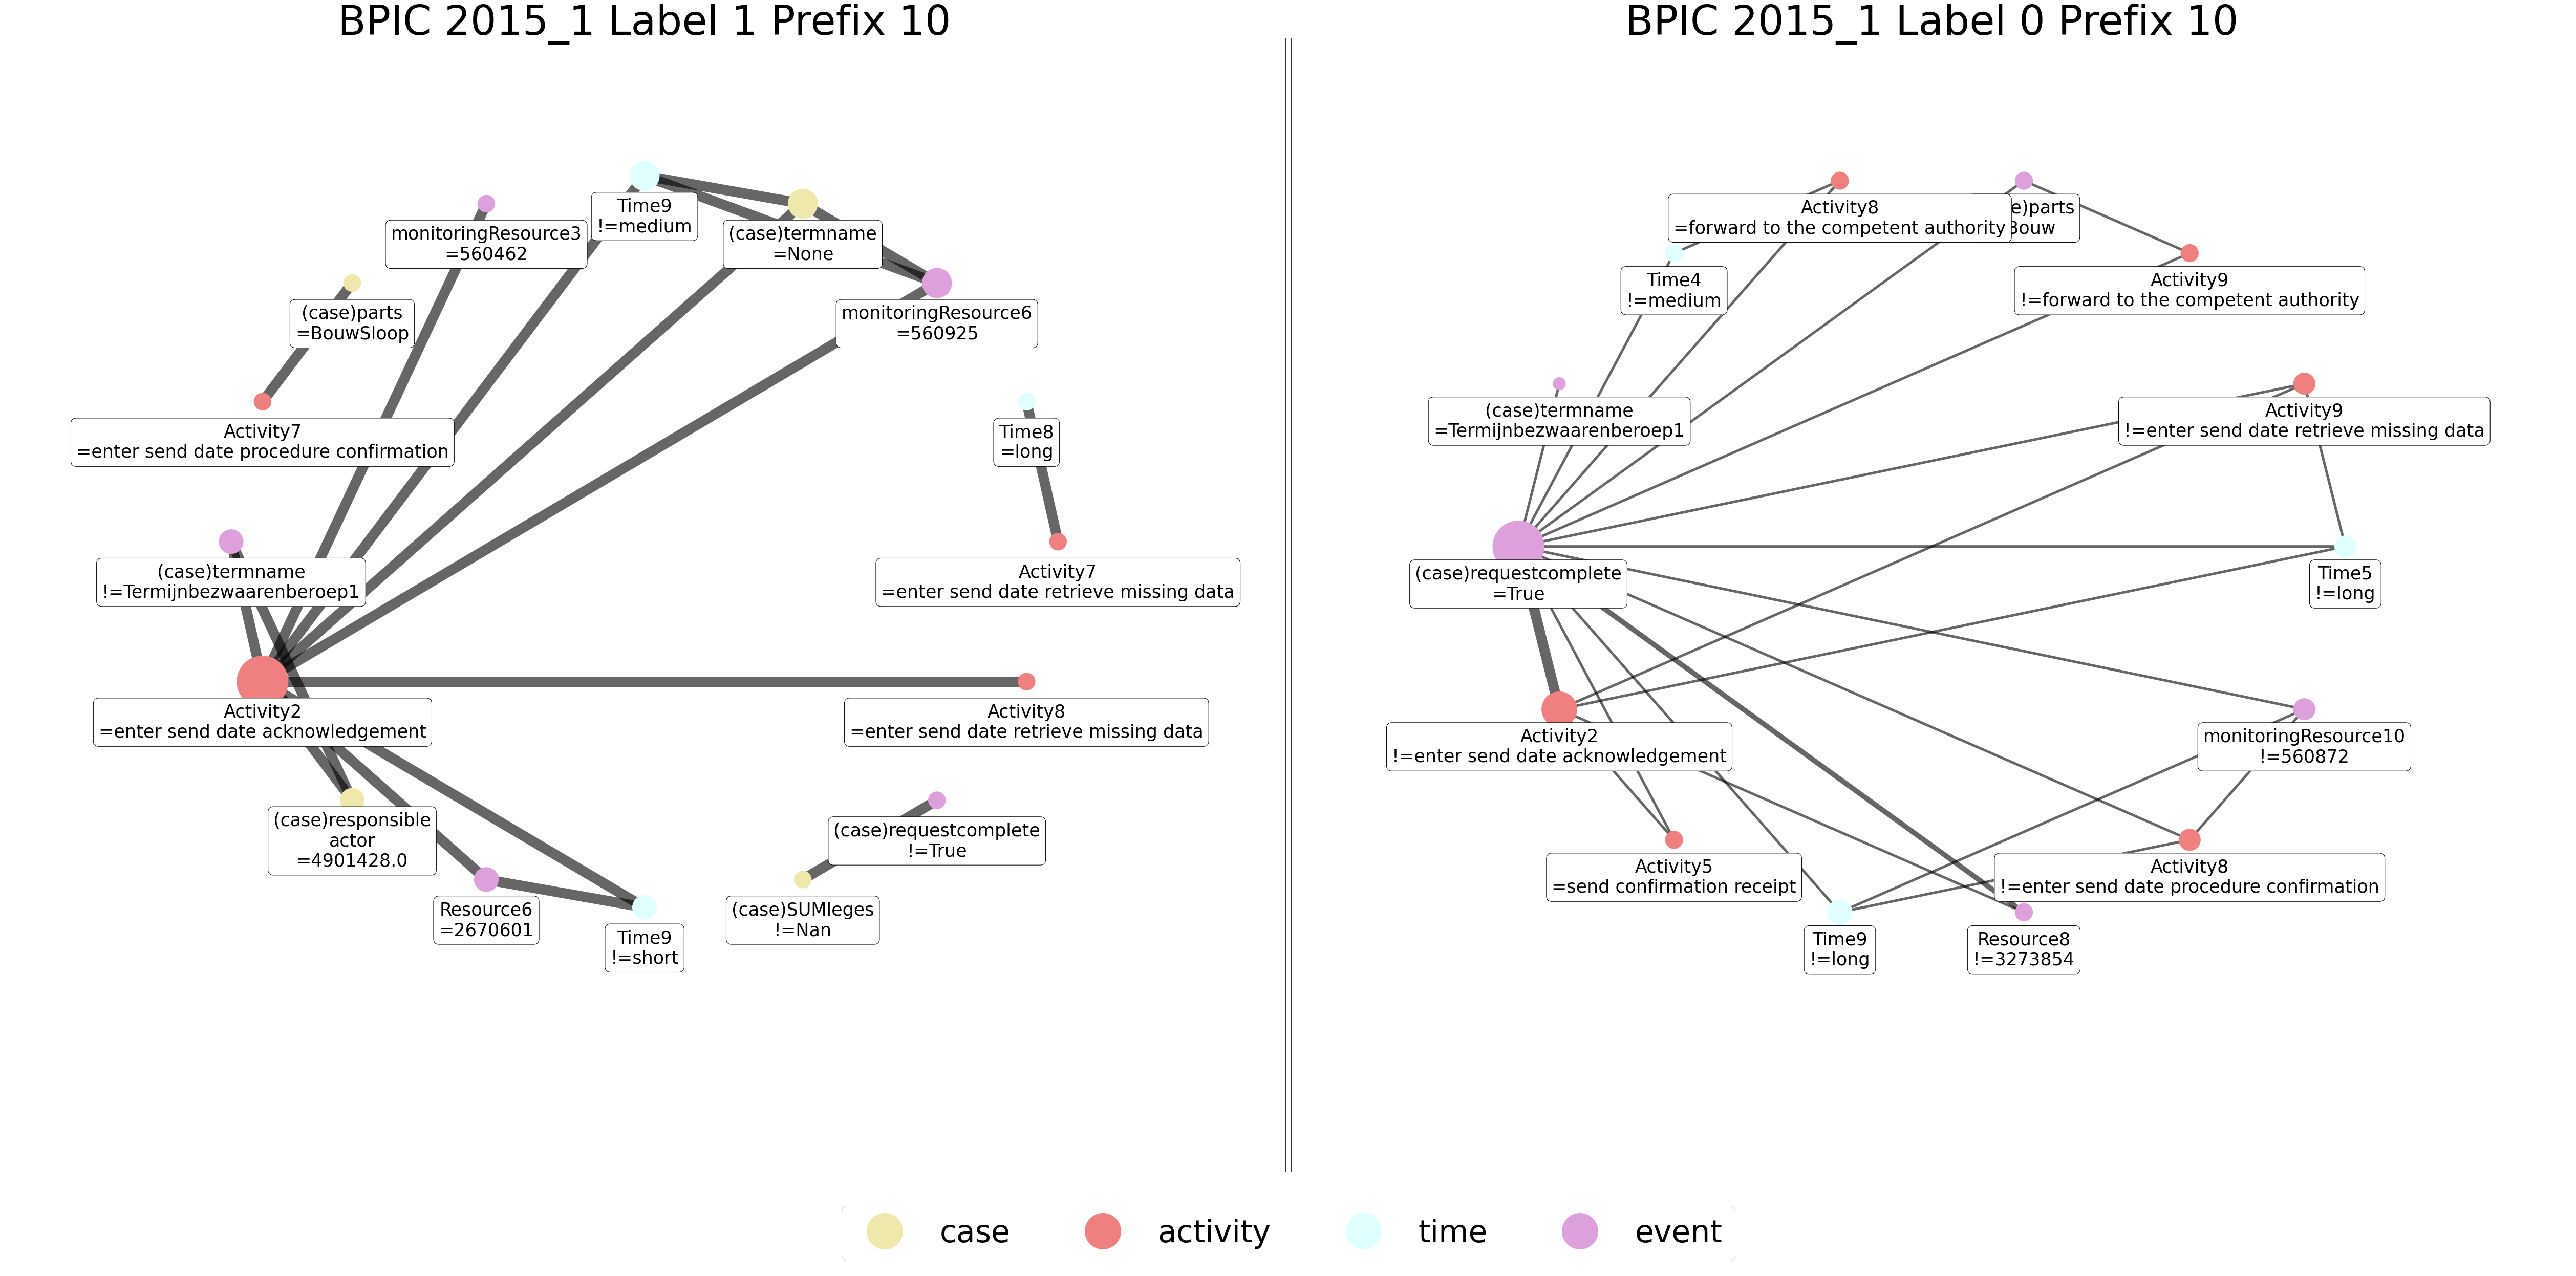

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(70,35))
ax1 = ax[0]
ax2 = ax[1]
prefix = str(10)
graph = nx.Graph()
edges = {}

nodefrequency = {}

# filename = '../dat/dataset/bpic/bpic2011/RIPPER/ruleresult/way3/threshold0.8/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'
# filename = '../daa/dataset/bpic/bpic2012/ruleresult/way3/threshold0.7/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'
# filename = '../data/dataset/bpic/bpic2015_1/rule2/ruleresult/way3/threshold0.5/Summarized_Rule_prefix'+str(prefix)+'_rnd1.json'
# filename = '../data/dataset/bpic/bpic2017/rule2/ruleresult/way3/threshold0.5/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'
# filename = '../data/dataset/sepsis/rule1/ruleresult/way3/threshold0.9/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'


# 
ante = []
label = 'Label 1'

title = 'BPIC 2015_1 '+label+' Prefix '+prefix 
label = 'Label_1'


# BPIC 2011

data=['(case)requestcomplete_!=True','Activity2_=enter send date acknowledgement/(case)termname_!=Termijnbezwaarenberoep1/(case)responsible_actor_=4901428.0',
      'Activity2_=enter send date acknowledgement/Resource6_=2670601/Time9_!=short',
      'Activity9_=enter send date retrieve missing data','(case)requestcomplete_!=True/(case)SUMleges_!=Nan',
      'Activity2_=enter send date acknowledgement/Activity8_=enter send date retrieve missing data',
      'Activity8_=enter send date retrieve missing data',
      'Activity7_=enter send date retrieve missing data/Time8_=long',
      'Activity2_=enter send date acknowledgement/monitoringResource6_=560925/(case)termname_=None/Time9_!=medium',
      
      'Activity2_=enter send date acknowledgement/monitoringResource3_=560462',
      
      'Activity7_=enter send date procedure confirmation/(case)parts_=BouwSloop']
# Rule : [Activity2_entersenddateacknowledgement=1/Time9_long=1/(case)parts_Bouw=0’,’Activity2_entersenddateacknowledgement=1/(case)caseprocedure_Uitgebreid=1/Time4_long=0’,’monitoringResource6_560925=1/Activity7_entersenddateprocedureconfirmation=1/Time4_long=0’,’Activity9_entersenddateretrievemissingdata=1’,’Activity8_entersenddateretrievemissingdata=1’,’Activity5_entersenddateretrievemissingdata=1’,’Activity10_entersenddateretrievemissingdata=1]


# # # BPIC 2012
case_att = ['(case) includes_subcases', '(case) responsible_actor', '(case) SUMleges', '(case) caseprocedure',
'(case) casestatus', '(case) case_type', '(case) last_phase', '(case) parts', '(case) requestcomplete',
'(case) termname']
event_att = []
act = ['Activity']
time = ['Time']

# data = [ 'Specialism code3_86/(case) Diagnosis code_M16','Specialism code4_86/(case) Diagnosis code_M16',
#  'Specialism code3_86/(case) Diagnosis code:1_M16', '(case) Specialism code:1_7.0/(case) Diagnosis code_M14/Specialism code1_86',
#  '(case) Diagnosis code:1_M14’/Producer code1_SGNA', 'Specialism code1_86/(case) Diagnosis code_M14',
#  '(case) Diagnosis code:1_M16/Specialism code8_86' ]

for t in data:
    ante.append(t.split('/'))

for rules in ante:
    for combis in list(combinations(rules,2)):
        combis = tuple(sorted(combis))
        if combis[0] not in list(nodefrequency.keys()):
            nodefrequency[combis[0]] =1
        else:
            nodefrequency[combis[0]] +=1

        if combis[1] not in list(nodefrequency.keys()):
            nodefrequency[combis[1]] =1
        else:
            nodefrequency[combis[1]] +=1


        if combis not in list(edges.keys()):
            edges[combis] =1
        else:
            edges[combis] +=1

edgeweight=[]
colorset ={'case':'palegoldenrod','activity':'lightcoral','time':'lightcyan','event':'plum'}
for x,y in edges.keys():
    if x.split('_')[0] in case_att or '(case)' in x.split('_')[0]:
        graph.add_node(x,color=colorset['case'],freqeuncy=nodefrequency[x])
    elif 'Activity' in x.split('_')[0]:
        graph.add_node(x,color=colorset['activity'],freqeuncy=nodefrequency[x])
    elif 'Time' in x.split('_')[0]:
        graph.add_node(x,color=colorset['time'],freqeuncy=nodefrequency[x])
    else:
        graph.add_node(x,color=colorset['event'],freqeuncy=nodefrequency[x])

    if y.split('_')[0] in case_att:
        graph.add_node(y,color=colorset['case'],freqeuncy=nodefrequency[y])
    elif 'Activity' in y.split('_')[0]:
        graph.add_node(y,color=colorset['activity'],freqeuncy=nodefrequency[y])
    elif 'Time' in y.split('_')[0]:
        graph.add_node(y,color=colorset['time'],freqeuncy=nodefrequency[y])
    else:
        graph.add_node(y,color=colorset['event'],freqeuncy=nodefrequency[y])

    graph.add_edge(x,y,weight=edges[(x,y)])
    edgeweight.append(edges[(x,y)])

edgeweight = [20*x/max(edgeweight) for x in edgeweight]
pos = nx.shell_layout(graph)
for t in pos.keys():
    pos[t] = pos[t]*0.9

node_size = [x[1] for x in graph.nodes.data('freqeuncy')]

node_size = [10000*x/max(node_size) for x in node_size]
# nx.draw_networkx_nodes(graph,pos,ax=ax1,font_size=10,node_color=[x[1] for x in graph.nodes.data('color')],node_size=node_size)
nx.draw_networkx_nodes(graph,pos,ax=ax1,node_color=[x[1] for x in graph.nodes.data('color')],node_size=node_size)
nx.draw_networkx_edges(graph,pos,ax=ax1,width=edgeweight,alpha=0.6)
for p in pos:  # raise text positions
    pos[p][1] -= 0.1

labels ={}


for k in graph.nodes:
    labels[k] = k.replace('_','\n')
box = {
'facecolor' : '1',
'edgecolor' : 'black',
'boxstyle'  : 'round'
}
nx.draw_networkx_labels(graph, pos,ax=ax1,labels=labels,font_size=35,bbox=box)

ax1.set_title(title,fontsize=80)
fig.subplots_adjust()
cut = 1.55
xmin =cut*min(xx for xx,yy in pos.values()) 
ymin= cut*min(yy for xx,yy in pos.values())
xmax= cut*max(xx for xx,yy in pos.values())
ymax= cut*max(yy for xx,yy in pos.values())

ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)

prefix = str(10)
graph = nx.Graph()
edges = {}
nodefrequency = {}

# filename = '../data/dataset/bpic/bpic2012/ruleresult/way3/threshold0.7/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'
# with open(filename,'r') as f:
#     data = json.load(f)

data = ['(case)requestcomplete_=True/Activity2_!=enter send date acknowledgement/Activity5_=send confirmation receipt',
        '(case)requestcomplete_=True/Activity2_!=enter send date acknowledgement','(case)requestcomplete_=True/Time9_!=long',
        '(case)requestcomplete_=True/Activity2_!=enter send date acknowledgement/Resource8_!=3273854', 
        '(case)requestcomplete_=True/Activity8_!=enter send date procedure confirmation/Time9_!=long/monitoringResource10_!=560872',
        '(case)requestcomplete_=True/Activity2_!=enter send date acknowledgement/Time5_!=long/Activity9_!=enter send date retrieve missing data',
        '(case)requestcomplete_=True/Activity9_!=forward to the competent authority/(case)parts_=Bouw',
        '(case)requestcomplete_=True/Activity8_=forward to the competent authority/Time4_!=medium',
        'monitoringResource9_=560894','monitoringResource1_=4161805',
        '(case)requestcomplete_=True/(case)termname_=Termijnbezwaarenberoep1'
       ] 


ante = []
label = 'Label 0'
title = 'BPIC 2015_1 '+label+' Prefix '+prefix 
label = 'Label_0'

# # # BPIC 2012
case_att = ['(case) includes_subcases', '(case) responsible_actor', '(case) SUMleges', '(case) caseprocedure',
'(case) casestatus', '(case) case_type', '(case) last_phase', '(case) parts', '(case) requestcomplete',
'(case) termname']
event_att = []
act = ['Activity']
time = ['Time']
for t in data:
    ante.append(t.split('/'))

for rules in ante:
    for combis in list(combinations(rules,2)):
        combis = tuple(sorted(combis))
        if combis[0] not in list(nodefrequency.keys()):
            nodefrequency[combis[0]] =1
        else:
            nodefrequency[combis[0]] +=1

        if combis[1] not in list(nodefrequency.keys()):
            nodefrequency[combis[1]] =1
        else:
            nodefrequency[combis[1]] +=1


        if combis not in list(edges.keys()):
            edges[combis] =1
        else:
            edges[combis] +=1

edgeweight=[]
colorset ={'case':'palegoldenrod','activity':'lightcoral','time':'lightcyan','event':'plum'}
for x,y in edges.keys():
    if x.split('_')[0] in case_att:
        graph.add_node(x,color=colorset['case'],freqeuncy=nodefrequency[x])
    elif 'Activity' in x.split('_')[0]:
        graph.add_node(x,color=colorset['activity'],freqeuncy=nodefrequency[x])
    elif 'Time' in x.split('_')[0]:
        graph.add_node(x,color=colorset['time'],freqeuncy=nodefrequency[x])
    else:
        graph.add_node(x,color=colorset['event'],freqeuncy=nodefrequency[x])

    if y.split('_')[0] in case_att:
        graph.add_node(y,color=colorset['case'],freqeuncy=nodefrequency[y])
    elif 'Activity' in y.split('_')[0]:
        graph.add_node(y,color=colorset['activity'],freqeuncy=nodefrequency[y])
    elif 'Time' in y.split('_')[0]:
        graph.add_node(y,color=colorset['time'],freqeuncy=nodefrequency[y])
    else:
        graph.add_node(y,color=colorset['event'],freqeuncy=nodefrequency[y])

    graph.add_edge(x,y,weight=edges[(x,y)])
    edgeweight.append(edges[(x,y)])

edgeweight = [20*x/max(edgeweight) for x in edgeweight]
pos = nx.shell_layout(graph,scale=1)

# margin=0.33
# fig.subplots_adjust(margin, margin, 1.-margin, 1.-margin)
# ax2.axis('equal')

node_size = [x[1] for x in graph.nodes.data('freqeuncy')]

node_size = [10000*x/max(node_size) for x in node_size]
nx.draw_networkx_nodes(graph,pos,ax=ax2,node_color=[x[1] for x in graph.nodes.data('color')],node_size=node_size)
nx.draw_networkx_edges(graph,pos,ax=ax2,width=edgeweight,alpha=0.6)
for p in pos:  # raise text positions
    pos[p][1] -= 0.1

labels ={}


for k in graph.nodes:
    labels[k] = k.replace('_','\n')
box = {
'facecolor' : '1',
'edgecolor' : 'black',
'boxstyle'  : 'round'
}
nx.draw_networkx_labels(graph, pos,ax=ax2,labels=labels,font_size=35, bbox=box)


ax2.set_title(title,fontsize=80)
fig.subplots_adjust()

cut = 1.55
xmin =cut*min(xx for xx,yy in pos.values()) 
ymin= cut*min(yy for xx,yy in pos.values())
xmax= cut*max(xx for xx,yy in pos.values())
ymax= cut*max(yy for xx,yy in pos.values())

ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin,ymax)

colors = ["g", "w"]
texts = ["Green Data Description", "RedData Description"]
patches = [ plt.plot([],[], marker="o", ms=70, ls="", mec=None, color=colorset[i], 
            label="{:s}".format(i) )[0]  for i in colorset.keys() ]

plt.tight_layout()

# plt.legend(handles=patches, 
#            loc='upper right', fontsize=60)

plt.subplots_adjust(bottom=0.09)
fig.legend(handles=patches,
           loc="lower center",   # Position of legend
               # Small spacing around legend box
           fontsize=60,
           ncol=4
           )

plt.savefig('./bpic2015_1_1network.pdf')
plt.show()



[6666.666666666667, 10000.0, 6666.666666666667, 6666.666666666667]


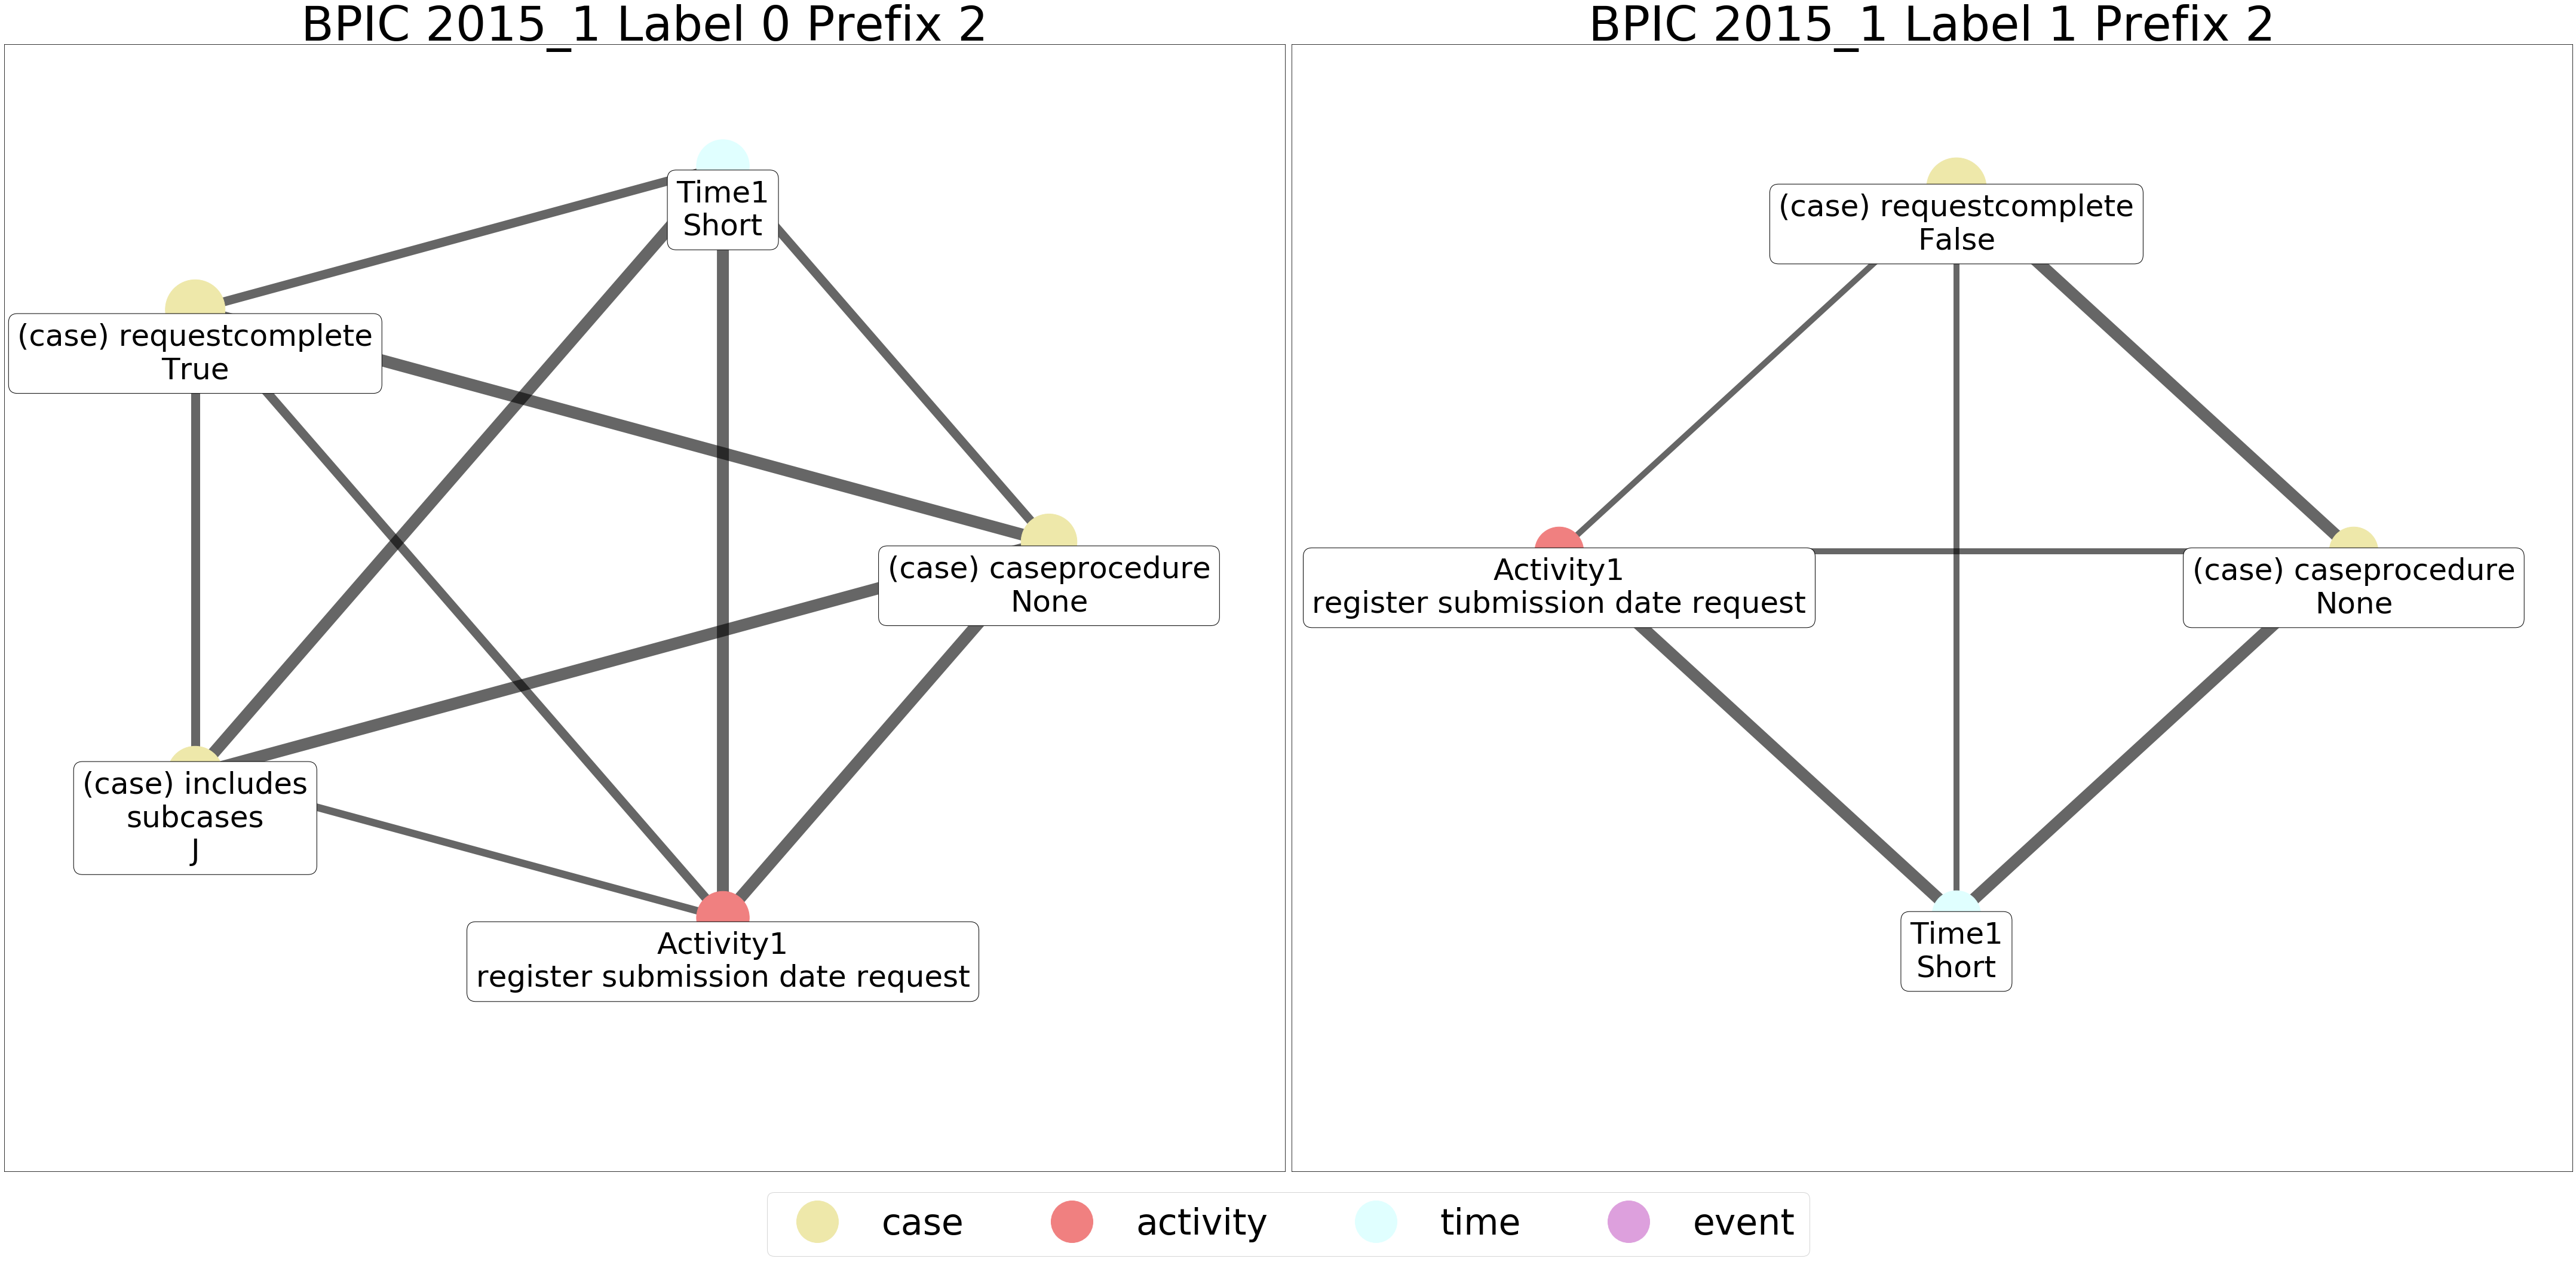

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(60,30))
ax1 = ax[0]
ax2 = ax[1]
prefix = str(2)
graph = nx.Graph()
edges = {}

nodefrequency = {}

filename = '../data/bpic2015/ltl1/bpic2015_1/ruleresult/way3/threshold0.7/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'
with open(filename,'r') as f:
    data = json.load(f)

ante = []
label = 'Label 0'

title = 'BPIC 2015_1 '+label+' Prefix '+prefix 
label = 'Label_0'
# BPIC 2015
case_att = ['(case) includes_subcases', '(case) responsible_actor', '(case) SUMleges', '(case) caseprocedure',
'(case) casestatus', '(case) case_type', '(case) last_phase', '(case) parts', '(case) requestcomplete',
'(case) termname']

event_att = []
act = ['Activity']
time = ['Time']

for d in data[label]:
    for t in data[label][d]:
        ante.append(t.split('/'))

for rules in ante:
    for combis in list(combinations(rules,2)):
        combis = tuple(sorted(combis))
        if combis[0] not in list(nodefrequency.keys()):
            nodefrequency[combis[0]] =1
        else:
            nodefrequency[combis[0]] +=1

        if combis[1] not in list(nodefrequency.keys()):
            nodefrequency[combis[1]] =1
        else:
            nodefrequency[combis[1]] +=1


        if combis not in list(edges.keys()):
            edges[combis] =1
        else:
            edges[combis] +=1

edgeweight=[]
colorset ={'case':'palegoldenrod','activity':'lightcoral','time':'lightcyan','event':'plum'}
for x,y in edges.keys():
    if x.split('_')[0] in case_att or '(case)' in x.split('_')[0]:
        graph.add_node(x,color=colorset['case'],freqeuncy=nodefrequency[x])
    elif 'Activity' in x.split('_')[0]:
        graph.add_node(x,color=colorset['activity'],freqeuncy=nodefrequency[x])
    elif 'Time' in x.split('_')[0]:
        graph.add_node(x,color=colorset['time'],freqeuncy=nodefrequency[x])
    else:
        graph.add_node(x,color=colorset['event'],freqeuncy=nodefrequency[x])

    if y.split('_')[0] in case_att:
        graph.add_node(y,color=colorset['case'],freqeuncy=nodefrequency[y])
    elif 'Activity' in y.split('_')[0]:
        graph.add_node(y,color=colorset['activity'],freqeuncy=nodefrequency[y])
    elif 'Time' in y.split('_')[0]:
        graph.add_node(y,color=colorset['time'],freqeuncy=nodefrequency[y])
    else:
        graph.add_node(y,color=colorset['event'],freqeuncy=nodefrequency[y])

    graph.add_edge(x,y,weight=edges[(x,y)])
    edgeweight.append(edges[(x,y)])

edgeweight = [20*x/max(edgeweight) for x in edgeweight]
pos = nx.shell_layout(graph)
for t in pos.keys():
    pos[t] = pos[t]*0.9
# margin=0.33
# fig.subplots_adjust(margin, margin, 1.-margin, 1.-margin)
# ax.axis('equal')
node_size = [x[1] for x in graph.nodes.data('freqeuncy')]

node_size = [10000*x/max(node_size) for x in node_size]
nx.draw_networkx_nodes(graph,pos,ax=ax1,font_size=10,node_color=[x[1] for x in graph.nodes.data('color')],node_size=node_size)
nx.draw_networkx_edges(graph,pos,ax=ax1,width=edgeweight,alpha=0.6,len=0.7)
for p in pos:  # raise text positions
    pos[p][1] -= 0.1

labels ={}


for k in graph.nodes:
    labels[k] = k.replace('_','\n')
box = {
'facecolor' : '1',
'edgecolor' : 'black',
'boxstyle'  : 'round'
}
nx.draw_networkx_labels(graph, pos,ax=ax1,labels=labels,font_size=50,bbox=box)

ax1.set_title(title,fontsize=80)
fig.subplots_adjust()
cut = 1.5
xmin =cut*min(xx for xx,yy in pos.values()) 
ymin= cut*min(yy for xx,yy in pos.values())
xmax= cut*max(xx for xx,yy in pos.values())
ymax= cut*max(yy for xx,yy in pos.values())

ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)

prefix = str(2)
graph = nx.Graph()
edges = {}
nodefrequency = {}

filename = '../data/bpic2015/ltl1/bpic2015_1/ruleresult/way3/threshold0.7/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'
with open(filename,'r') as f:
    data = json.load(f)

ante = []
label = 'Label 1'
title = 'BPIC 2015_1 '+label+' Prefix '+prefix 
label = 'Label_1'

# BPIC 2015
case_att = ['(case) includes_subcases', '(case) responsible_actor', '(case) SUMleges', '(case) caseprocedure',
'(case) casestatus', '(case) case_type', '(case) last_phase', '(case) parts', '(case) requestcomplete',
'(case) termname']
event_att = []
act = ['Activity']
time = ['Time']

for d in data[label]:
    for t in data[label][d]:
        ante.append(t.split('/'))

for rules in ante:
    for combis in list(combinations(rules,2)):
        combis = tuple(sorted(combis))
        if combis[0] not in list(nodefrequency.keys()):
            nodefrequency[combis[0]] =1
        else:
            nodefrequency[combis[0]] +=1

        if combis[1] not in list(nodefrequency.keys()):
            nodefrequency[combis[1]] =1
        else:
            nodefrequency[combis[1]] +=1


        if combis not in list(edges.keys()):
            edges[combis] =1
        else:
            edges[combis] +=1

edgeweight=[]
colorset ={'case':'palegoldenrod','activity':'lightcoral','time':'lightcyan','event':'plum'}
for x,y in edges.keys():
    if x.split('_')[0] in case_att:
        graph.add_node(x,color=colorset['case'],freqeuncy=nodefrequency[x])
    elif 'Activity' in x.split('_')[0]:
        graph.add_node(x,color=colorset['activity'],freqeuncy=nodefrequency[x])
    elif 'Time' in x.split('_')[0]:
        graph.add_node(x,color=colorset['time'],freqeuncy=nodefrequency[x])
    else:
        graph.add_node(x,color=colorset['event'],freqeuncy=nodefrequency[x])

    if y.split('_')[0] in case_att:
        graph.add_node(y,color=colorset['case'],freqeuncy=nodefrequency[y])
    elif 'Activity' in y.split('_')[0]:
        graph.add_node(y,color=colorset['activity'],freqeuncy=nodefrequency[y])
    elif 'Time' in y.split('_')[0]:
        graph.add_node(y,color=colorset['time'],freqeuncy=nodefrequency[y])
    else:
        graph.add_node(y,color=colorset['event'],freqeuncy=nodefrequency[y])

    graph.add_edge(x,y,weight=edges[(x,y)])
    edgeweight.append(edges[(x,y)])

edgeweight = [20*x/max(edgeweight) for x in edgeweight]
pos = nx.shell_layout(graph,scale=1)

node_size = [x[1] for x in graph.nodes.data('freqeuncy')]

node_size = [10000*x/max(node_size) for x in node_size]
print(node_size)
nx.draw_networkx_nodes(graph,pos,ax=ax2,font_size=10,node_color=[x[1] for x in graph.nodes.data('color')],node_size=node_size)
nx.draw_networkx_edges(graph,pos,ax=ax2,width=edgeweight,alpha=0.6,len=0.7)
for p in pos:  # raise text positions
    pos[p][1] -= 0.1

labels ={}


for k in graph.nodes:
    labels[k] = k.replace('_','\n')
box = {
'facecolor' : '1',
'edgecolor' : 'black',
'boxstyle'  : 'round'
}
nx.draw_networkx_labels(graph, pos,ax=ax2,labels=labels,font_size=50,with_labels = True,bbox=box)

ax2.set_title(title,fontsize=80)
fig.subplots_adjust()

cut = 1.55
xmin =cut*min(xx for xx,yy in pos.values()) 
ymin= cut*min(yy for xx,yy in pos.values())
xmax= cut*max(xx for xx,yy in pos.values())
ymax= cut*max(yy for xx,yy in pos.values())

ax2.set_xlim(xmin*1.08,xmax)
ax2.set_ylim(ymin,ymax)

colors = ["g", "w"]
texts = ["Green Data Description", "RedData Description"]
patches = [ plt.plot([],[], marker="o", ms=70, ls="", mec=None, color=colorset[i], 
            label="{:s}".format(i) )[0]  for i in colorset.keys() ]

plt.tight_layout()

# plt.legend(handles=patches, 
#            loc='upper right', fontsize=60)

plt.subplots_adjust(bottom=0.09)
fig.legend(handles=patches,
           loc="lower center",   # Position of legend
               # Small spacing around legend box
           fontsize=60,
           ncol=4
           )

plt.savefig('./bpic2015_1network.pdf')
plt.show()



10000.0
10000.0


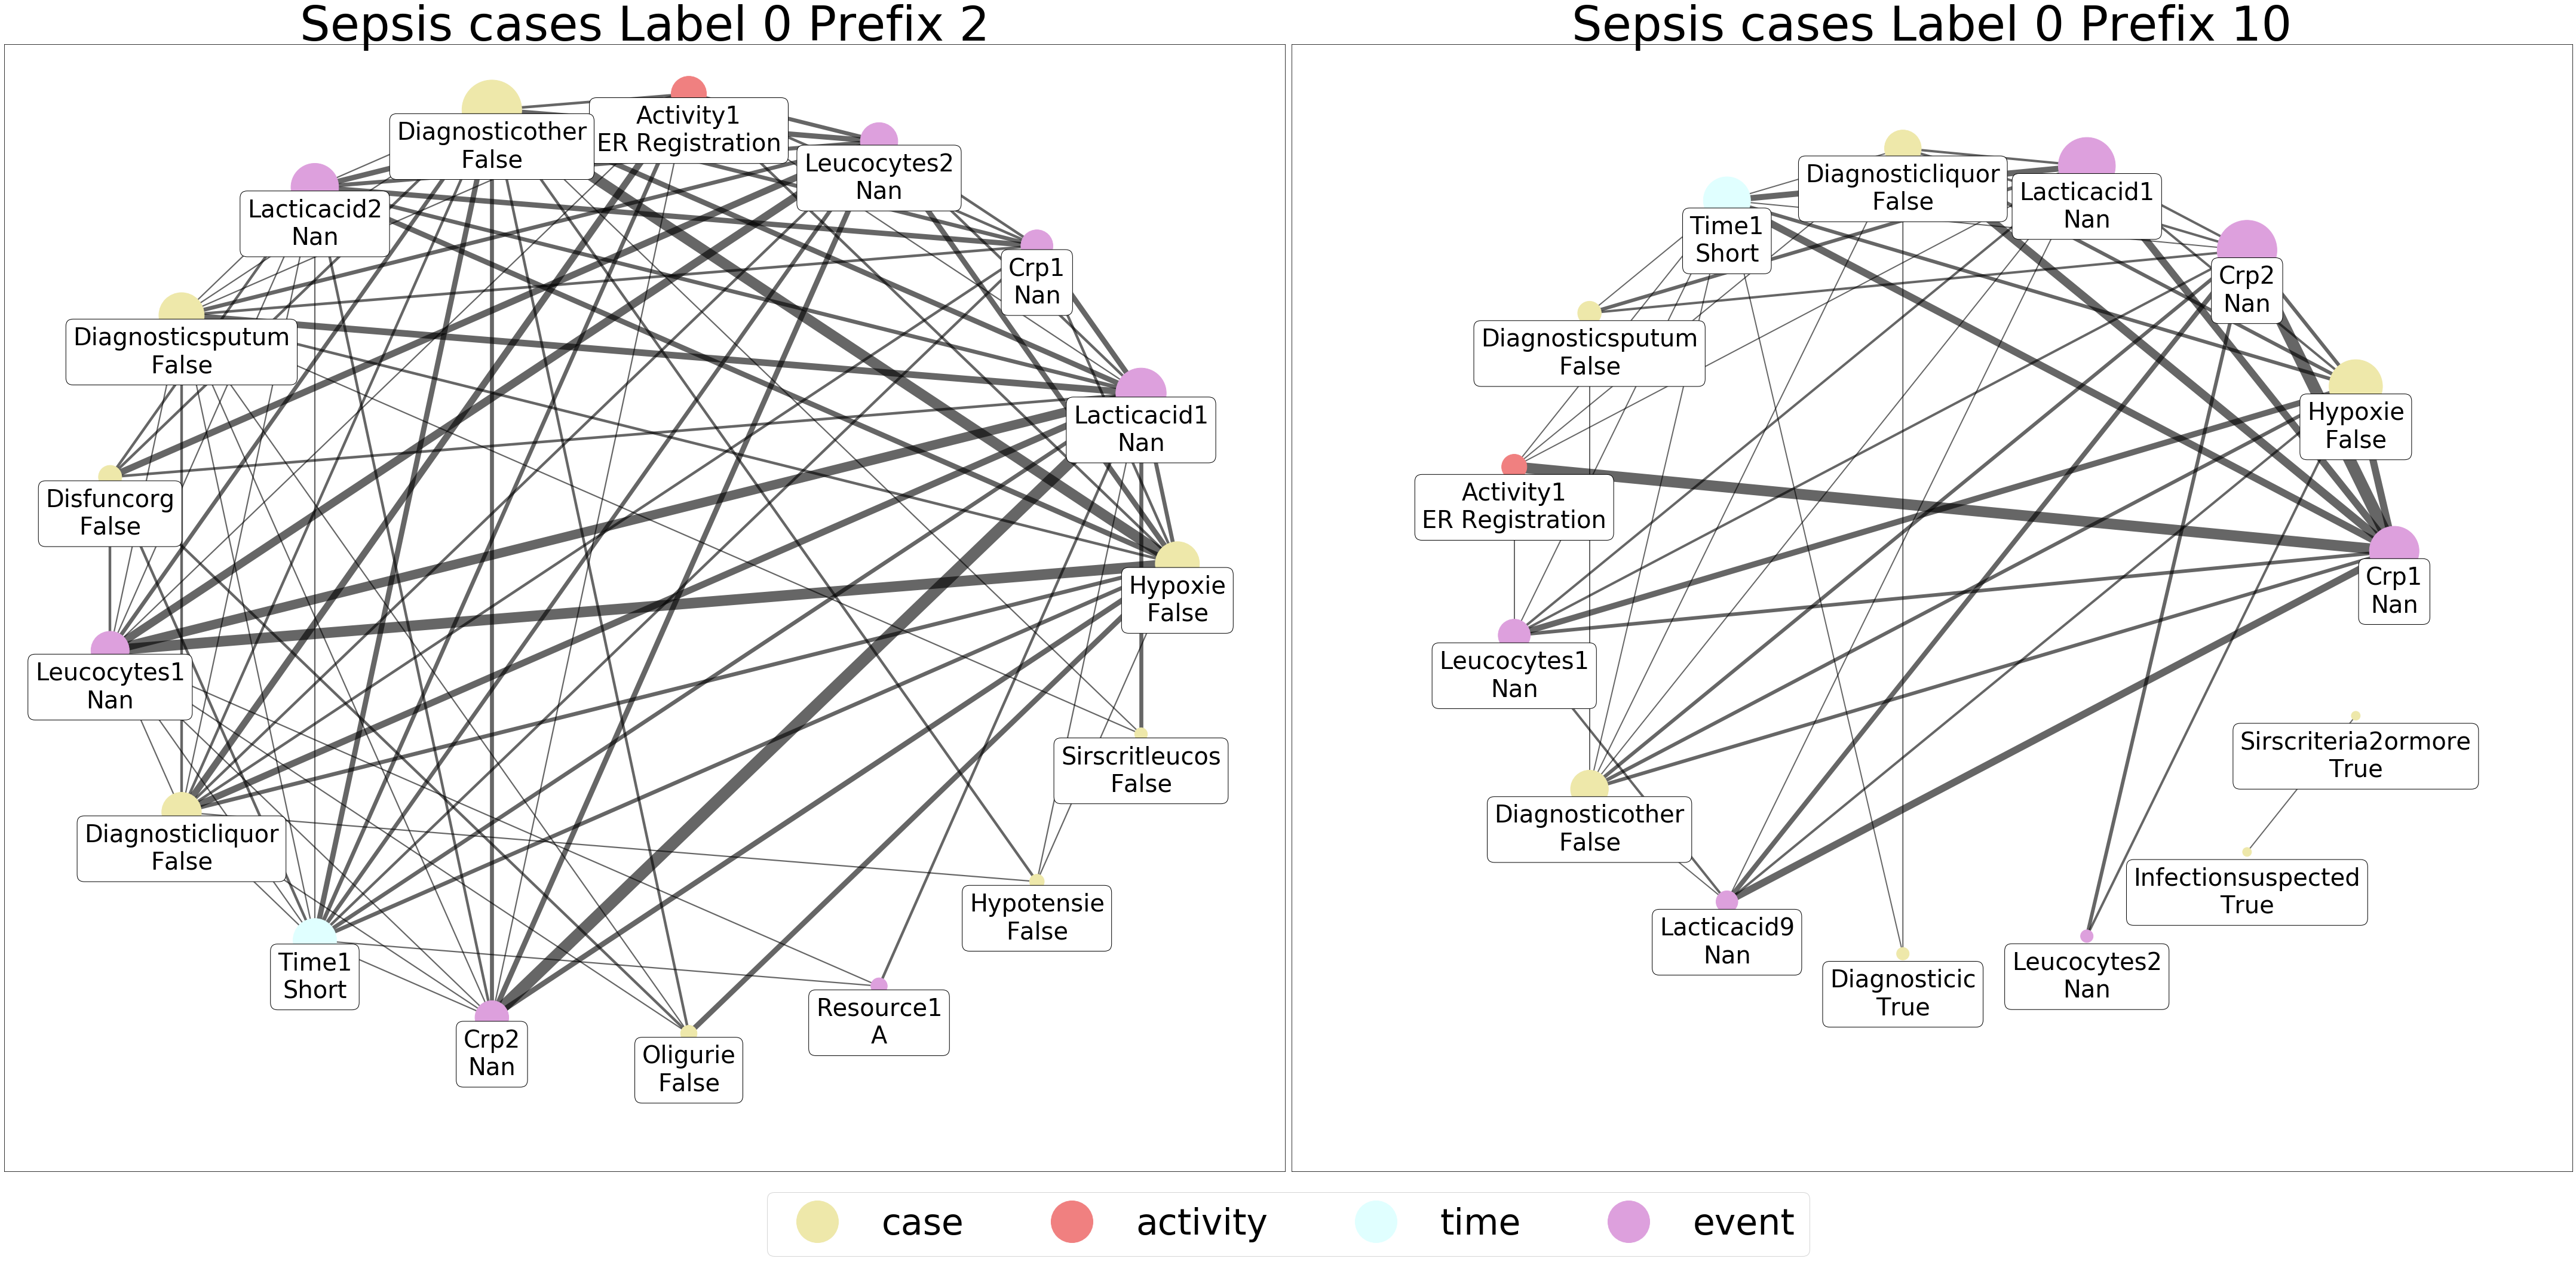

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(60,30))
ax1 = ax[0]
ax2 = ax[1]
prefix = str(2)
graph = nx.Graph()
edges = {}

nodefrequency = {}

filename = '../data/sepsis/rule1/ruleresult/way3/threshold0.9/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'
with open(filename,'r') as f:
    data = json.load(f)

ante = []
label = 'Label 0'

title = 'Sepsis cases '+label+' Prefix '+prefix 
label = 'Label_0'
# Sepsis
case_att = ['Diagnose','DiagnosticArtAstrup','DiagnosticBlood','DiagnosticECG','DiagnosticIC','DiagnosticLacticAcid',
                'DiagnosticLiquor','DiagnosticOther','DiagnosticSputum','DiagnosticUrinaryCulture','DiagnosticUrinarySediment',
                'DiagnosticXthorax','DisfuncOrg','Hypotensie','Hypoxie','InfectionSuspected','Infusion','Oligurie','SIRSCritHeartRate',
                'SIRSCritLeucos','SIRSCritTachypnea','SIRSCritTemperature','SIRSCriteria2OrMore','Age']
case_att = [x.capitalize() for x in case_att]
event_att = ['Resource','CRP','LacticAcid','Leucocytes']
event_att = [x.capitalize() for x in event_att]
act = ['Activity']

for d in data[label]:
    for t in data[label][d]:
        ante.append(t.split('/'))

for rules in ante:
    for combis in list(combinations(rules,2)):
        combis = tuple(sorted(combis))
        if combis[0] not in list(nodefrequency.keys()):
            nodefrequency[combis[0]] =1
        else:
            nodefrequency[combis[0]] +=1

        if combis[1] not in list(nodefrequency.keys()):
            nodefrequency[combis[1]] =1
        else:
            nodefrequency[combis[1]] +=1


        if combis not in list(edges.keys()):
            edges[combis] =1
        else:
            edges[combis] +=1

edgeweight=[]
colorset ={'case':'palegoldenrod','activity':'lightcoral','time':'lightcyan','event':'plum'}
for x,y in edges.keys():
    if x.split('_')[0] in case_att or '(case)' in x.split('_')[0]:
        graph.add_node(x,color=colorset['case'],freqeuncy=nodefrequency[x])
    elif 'Activity' in x.split('_')[0]:
        graph.add_node(x,color=colorset['activity'],freqeuncy=nodefrequency[x])
    elif 'Time' in x.split('_')[0]:
        graph.add_node(x,color=colorset['time'],freqeuncy=nodefrequency[x])
    else:
        graph.add_node(x,color=colorset['event'],freqeuncy=nodefrequency[x])

    if y.split('_')[0] in case_att:
        graph.add_node(y,color=colorset['case'],freqeuncy=nodefrequency[y])
    elif 'Activity' in y.split('_')[0]:
        graph.add_node(y,color=colorset['activity'],freqeuncy=nodefrequency[y])
    elif 'Time' in y.split('_')[0]:
        graph.add_node(y,color=colorset['time'],freqeuncy=nodefrequency[y])
    else:
        graph.add_node(y,color=colorset['event'],freqeuncy=nodefrequency[y])

    graph.add_edge(x,y,weight=edges[(x,y)])
    edgeweight.append(edges[(x,y)])

edgeweight = [20*x/max(edgeweight) for x in edgeweight]
pos = nx.shell_layout(graph)
for t in pos.keys():
    pos[t] = pos[t]*0.9
# margin=0.33
# fig.subplots_adjust(margin, margin, 1.-margin, 1.-margin)
# ax.axis('equal')
node_size = [x[1] for x in graph.nodes.data('freqeuncy')]

node_size = [10000*x/max(node_size) for x in node_size]
print(max(node_size))
nx.draw_networkx_nodes(graph,pos,ax=ax1,font_size=10,node_color=[x[1] for x in graph.nodes.data('color')],node_size=node_size)
nx.draw_networkx_edges(graph,pos,ax=ax1,width=edgeweight,alpha=0.6,len=0.7)
for p in pos:  # raise text positions
    pos[p][1] -= 0.07

labels ={}


for k in graph.nodes:
    labels[k] = k.replace('_','\n')
box = {
'facecolor' : '1',
'edgecolor' : 'black',
'boxstyle'  : 'round'
}
nx.draw_networkx_labels(graph, pos,ax=ax1,labels=labels,font_size=40,bbox=box)

ax1.set_title(title,fontsize=80)
fig.subplots_adjust()
cut = 1.2
xmin =cut*min(xx for xx,yy in pos.values()) 
ymin= cut*min(yy for xx,yy in pos.values())
xmax= cut*max(xx for xx,yy in pos.values())
ymax= cut*max(yy for xx,yy in pos.values())

ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)

prefix = str(10)
graph = nx.Graph()
edges = {}
nodefrequency = {}

filename = '../data/sepsis/rule1/ruleresult/way3/threshold0.9/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'
with open(filename,'r') as f:
    data = json.load(f)

ante = []
label = 'Label 0'
title = 'Sepsis cases '+label+' Prefix '+prefix 

label = 'Label_0'

# Sepsis
case_att = ['Diagnose','DiagnosticArtAstrup','DiagnosticBlood','DiagnosticECG','DiagnosticIC','DiagnosticLacticAcid',
                'DiagnosticLiquor','DiagnosticOther','DiagnosticSputum','DiagnosticUrinaryCulture','DiagnosticUrinarySediment',
                'DiagnosticXthorax','DisfuncOrg','Hypotensie','Hypoxie','InfectionSuspected','Infusion','Oligurie','SIRSCritHeartRate',
                'SIRSCritLeucos','SIRSCritTachypnea','SIRSCritTemperature','SIRSCriteria2OrMore','Age']
case_att = [x.capitalize() for x in case_att]
event_att = ['Resource','CRP','LacticAcid','Leucocytes']
event_att = [x.capitalize() for x in event_att]
act = ['Activity']
event_att = []
act = ['Activity']
time = ['Time']

for d in data[label]:
    for t in data[label][d]:
        ante.append(t.split('/'))

for rules in ante:
    for combis in list(combinations(rules,2)):
        combis = tuple(sorted(combis))
        if combis[0] not in list(nodefrequency.keys()):
            nodefrequency[combis[0]] =1
        else:
            nodefrequency[combis[0]] +=1

        if combis[1] not in list(nodefrequency.keys()):
            nodefrequency[combis[1]] =1
        else:
            nodefrequency[combis[1]] +=1


        if combis not in list(edges.keys()):
            edges[combis] =1
        else:
            edges[combis] +=1

edgeweight=[]
colorset ={'case':'palegoldenrod','activity':'lightcoral','time':'lightcyan','event':'plum'}
for x,y in edges.keys():
    if x.split('_')[0] in case_att:
        graph.add_node(x,color=colorset['case'],freqeuncy=nodefrequency[x])
    elif 'Activity' in x.split('_')[0]:
        graph.add_node(x,color=colorset['activity'],freqeuncy=nodefrequency[x])
    elif 'Time' in x.split('_')[0]:
        graph.add_node(x,color=colorset['time'],freqeuncy=nodefrequency[x])
    else:
        graph.add_node(x,color=colorset['event'],freqeuncy=nodefrequency[x])

    if y.split('_')[0] in case_att:
        graph.add_node(y,color=colorset['case'],freqeuncy=nodefrequency[y])
    elif 'Activity' in y.split('_')[0]:
        graph.add_node(y,color=colorset['activity'],freqeuncy=nodefrequency[y])
    elif 'Time' in y.split('_')[0]:
        graph.add_node(y,color=colorset['time'],freqeuncy=nodefrequency[y])
    else:
        graph.add_node(y,color=colorset['event'],freqeuncy=nodefrequency[y])

    graph.add_edge(x,y,weight=edges[(x,y)])
    edgeweight.append(edges[(x,y)])

edgeweight = [20*x/max(edgeweight) for x in edgeweight]
pos = nx.shell_layout(graph,scale=1)

node_size = [x[1] for x in graph.nodes.data('freqeuncy')]

node_size = [10000*x/max(node_size) for x in node_size]
print(max(node_size))
nx.draw_networkx_nodes(graph,pos,ax=ax2,font_size=10,node_color=[x[1] for x in graph.nodes.data('color')],node_size=node_size)
nx.draw_networkx_edges(graph,pos,ax=ax2,width=edgeweight,alpha=0.6,len=0.7)
for p in pos:  # raise text positions
    pos[p][1] -= 0.1

labels ={}


for k in graph.nodes:
    labels[k] = k.replace('_','\n')
box = {
'facecolor' : '1',
'edgecolor' : 'black',
'boxstyle'  : 'round'
}
nx.draw_networkx_labels(graph, pos,ax=ax2,labels=labels,font_size=40,with_labels = True,bbox=box)

ax2.set_title(title,fontsize=80)
fig.subplots_adjust()

cut = 1.4
xmin =cut*min(xx for xx,yy in pos.values()) 
ymin= cut*min(yy for xx,yy in pos.values())
xmax= cut*max(xx for xx,yy in pos.values())
ymax= cut*max(yy for xx,yy in pos.values())

ax2.set_xlim(xmin*1.08,xmax)
ax2.set_ylim(ymin,ymax)
plt.tight_layout()

colors = ["g", "w"]
texts = ["Green Data Description", "RedData Description"]
patches = [ plt.plot([],[], marker="o", ms=70, ls="", mec=None, color=colorset[i], 
            label="{:s}".format(i) )[0]  for i in colorset.keys() ]

# plt.legend(handles=patches, 
#            loc='upper right', fontsize=60)


plt.subplots_adjust(bottom=0.09)
fig.legend(handles=patches,
           loc="lower center",   # Position of legend
               # Small spacing around legend box
           fontsize=60,
           ncol=4
           )
plt.savefig('./sepsisnetwork.pdf')
plt.show()

